<a href="https://colab.research.google.com/github/sreekar-pasumarthi/Deep-Learning-Projects/blob/master/GLA_BRA_KPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1ZyVnXRR8yo-H1j4QS7BfW5lBPywM0PBc'
downloaded = drive.CreateFile({'id': file_id})

In [0]:
downloaded.GetContentFile('GLA-BRA-180.csv')

In [5]:
df_train=pd.read_csv('GLA-BRA-180.csv')
print(f'The train set contain {df_train.shape[0]} examples')
print(f'The train set contain {df_train.shape[1]} features')
df_train.head()#to select first n rows

The train set contain 179 examples
The train set contain 49152 features


,4701.5,282.7,769.6,1616.3,232.7,357.7,245.1,33.2,30.7,224.6,107.5,738.3,314.8,1074.7,1552.6,139.1,105.2,101.3,409.2,156.7,13.3,291.1,1894.8,702.6,11.3,755.8,291.1.1,828.8,71.2,205.2,1288.3,413.3,390.7,99.8,195.7,773.3,30.5,1066.6,5.2,216.1,...,94.2.14,272.1.6,86.6.15,658.7.2,441.5.7,354.9.6,1464.3.2,344.5.6,1086.7,336.8.8,672.3,743.8.2,89.2.11,1674,358.2.5,55.3.8,556.7.1,1453.7,188.3.8,404.7.3,326.4.8,630.1.4,179.3.9,562.7.2,2606.4,228.1.3,383.2.5,365.4.2,346.7.5,4767.9,453.4.3,585.5,724.2,476.1.2,215.8.5,1002.1.1,71.7.4,1524.7.2,318.9.6,1
0,4735.0,347.9,287.9,1527.2,204.8,336.5,186.2,22.9,57.1,133.7,270.8,564.2,355.8,1114.3,1003.8,201.6,108.3,55.5,666.3,201.8,12.8,209.5,2048.9,1158.1,47.8,855.5,204.3,634.9,158.0,265.3,671.0,362.5,490.1,20.1,123.9,526.4,29.9,1005.3,71.1,172.6,...,193.1,156.2,193.0,652.2,359.7,351.2,1545.5,322.9,1259.2,376.4,616.8,709.7,127.1,1822.4,291.0,61.1,686.0,1432.3,155.5,413.2,208.9,620.2,249.4,560.7,2169.7,390.5,365.4,305.0,461.8,3497.3,439.9,453.2,603.1,347.1,269.6,1017.2,33.0,1742.0,304.5,1
1,2863.9,355.0,199.0,1793.8,119.3,328.7,349.3,30.0,17.8,270.1,300.8,510.1,371.6,1191.8,1470.1,91.2,187.0,80.0,792.0,180.3,15.2,198.2,2023.3,1084.9,187.2,1015.4,213.4,1331.8,164.3,137.1,533.5,220.3,390.0,36.9,301.6,508.5,50.0,978.7,18.9,200.3,...,86.2,195.1,151.5,678.0,380.9,164.5,1539.3,257.1,1179.8,373.5,726.6,618.0,294.3,1397.7,276.1,90.7,821.1,1173.4,247.6,315.8,178.8,837.9,246.4,415.9,2198.6,649.4,766.7,394.4,366.3,3490.2,200.0,370.6,641.4,419.3,269.5,745.8,51.0,1333.5,322.0,1
2,5350.2,319.9,182.8,1880.0,180.2,304.7,325.4,47.6,30.7,186.4,163.2,542.0,336.2,1019.8,1507.2,218.1,98.9,184.4,590.7,209.8,19.1,275.8,3245.4,1320.0,79.7,850.2,333.7,807.4,155.6,403.5,703.7,435.6,469.4,12.4,353.1,592.1,34.0,1071.2,10.8,220.4,...,196.1,193.4,159.8,637.4,376.8,142.3,1799.8,323.4,1403.7,475.1,818.8,644.6,164.7,2259.5,296.8,54.2,977.1,1668.1,261.1,371.4,382.8,720.6,207.2,570.2,1969.8,206.4,548.3,419.3,382.4,4604.1,565.1,501.2,579.7,289.4,205.6,959.7,165.1,1572.5,302.9,1
3,4789.4,294.2,204.3,1012.0,156.7,190.1,132.0,18.8,11.8,218.5,221.4,601.2,216.4,1342.5,1238.2,110.8,85.8,72.0,798.8,109.1,11.9,145.0,1112.0,1683.1,49.7,921.2,123.2,467.1,38.8,44.1,776.7,310.3,572.3,12.3,132.5,702.3,32.0,914.9,45.9,159.6,...,147.6,205.3,181.7,635.4,330.6,216.6,1466.1,470.9,763.5,282.1,751.6,624.3,101.6,937.5,399.2,41.2,541.4,1164.4,78.2,434.1,287.7,586.7,343.4,326.8,2068.6,212.1,349.9,341.1,245.9,3939.1,395.4,439.6,523.0,408.0,240.4,996.8,48.7,1226.0,230.4,1
4,5837.8,257.5,184.9,1024.4,155.1,253.3,182.6,28.9,13.4,165.8,355.3,698.2,268.5,1196.6,833.8,145.2,60.6,104.1,1012.0,55.5,7.4,133.1,1771.4,2567.6,137.5,747.1,91.6,557.8,101.9,62.8,1149.8,328.2,630.0,14.9,124.5,549.4,36.2,1130.2,51.3,191.6,...,161.5,179.0,148.0,496.5,212.3,453.2,1703.8,507.4,888.8,260.8,572.9,608.7,101.6,1045.9,334.9,75.8,651.3,1258.1,119.1,469.5,209.0,646.2,176.1,369.8,1962.2,207.7,366.2,317.1,288.3,3707.8,372.6,423.9,496.1,370.7,159.6,1476.5,49.0,1222.4,246.3,1


In [0]:
X_train = df_train.drop('1', axis = 1)#drops the column type from the dataframe
y_train = df_train['1']#selects only the last column from the dataframe

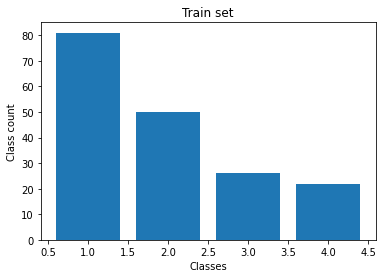

In [0]:
classes = y_train.unique()#no. of classes 
values = y_train.value_counts()#occurrence of each class

plt.bar(classes, values)
plt.title('Train set')
plt.xlabel('Classes')
plt.ylabel('Class count')
plt.show()
#data classes not spread uniformly thoughout the sample hence cannot split data and use it  

In [0]:
X_train.describe()

In [0]:
X_train = df_train.values#to convert it to array and then normalise
X_train = normalize(X_train)

In [16]:
y_train = to_categorical(y_train)#to convert y_train into to 'one hot vector'
y_train.shape

(179, 49152)

In [17]:
X_train.shape

(179, 49152)

In [109]:
from sklearn.decomposition import KernelPCA
x_train_reduced = KernelPCA(n_components=50).fit_transform(X_train)
x_train_reduced.shape

(179, 50)

In [0]:
def create_baseline():
 model = Sequential()
 model.add(Dense(10,input_shape=(50,),activation='relu'))
 model.add(Dense(5,activation='softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

In [111]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=200, batch_size=32, verbose=0)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, x_train_reduced, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 70.44% (6.55%)
